In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

## Ice Cream Production Data

In [2]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       577 non-null    object 
 1   IPN31152N  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [5]:
#convert date column
df_ice_cream['DATE'] = pd.to_datetime(df_ice_cream['DATE'])

In [6]:
df_ice_cream.dtypes

DATE         datetime64[ns]
IPN31152N           float64
dtype: object

In [7]:
df_ice_cream['DATE'].dt.year.unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

In [8]:
min_year = df_ice_cream['DATE'].dt.year.min()
max_year = df_ice_cream['DATE'].dt.year.max()

In [9]:
print(f'min year : {min_year}\nmax year : {max_year}')

min year : 1972
max year : 2020


In [10]:
df_ice_cream.columns

Index(['DATE', 'IPN31152N'], dtype='object')

In [11]:
#rename the columns
df_ice_cream.rename(columns={'DATE':'date', 
                             'IPN31152N':'production'},inplace=True)
df_ice_cream.sample(3)

,date,production
196,1988-05-01,130.0414
485,2012-06-01,124.3428
353,2001-06-01,148.4196


In [12]:
#set date column as index
df_ice_cream.set_index('date',inplace=True)
df_ice_cream.sample(3)

,production
date,
1974-03-01,84.2683
2005-10-01,144.2127
2001-08-01,134.7753


In [13]:
#get the data from only 2010
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [14]:
df_ice_cream.loc['2010-01-01']

production    91.2895
Name: 2010-01-01 00:00:00, dtype: float64

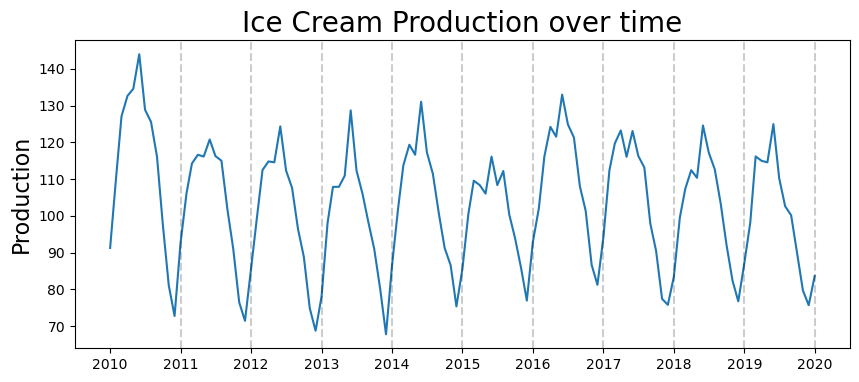

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over time', fontsize=20)
plt.ylabel('Production', fontsize=16)

for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    #Add a vertical line across the Axes.

## ACF

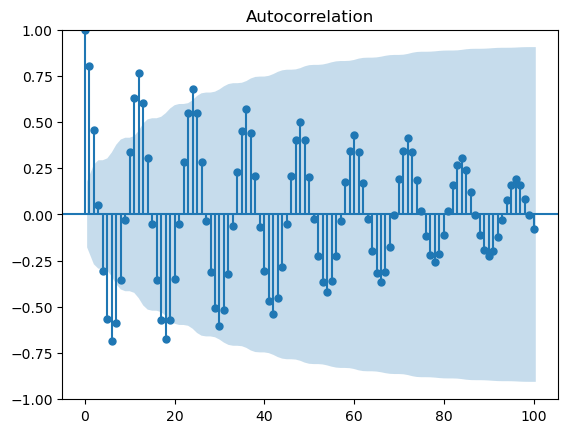

In [16]:
acf_plot = plot_acf(df_ice_cream.production,lags=100)

In [17]:
#Anything within the blue bar is not statistically significant

## Based on decaying ACF, we are likely dealing with an Auto Regressive process.
coz from Moving Average process, we would get a different signature, We got get few strong lags and then it would shut off.

C:\Users\ABANERJ7\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


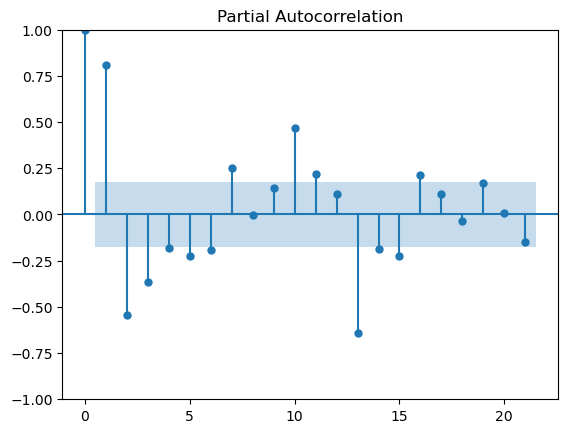

In [18]:
pacf_plot = plot_pacf(df_ice_cream.production)

## Based on PACF, we should start with an Auto Regressive model with lags 1,2,3,10,13

## On Stock data

In [19]:
import yfinance as yf

In [20]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [21]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [22]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [23]:
tickerDf = tickerDf[['Close']]

In [24]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.788895
2015-01-05 00:00:00-05:00,173.596146
2015-01-06 00:00:00-05:00,171.961029
2015-01-07 00:00:00-05:00,174.103882
2015-01-08 00:00:00-05:00,177.193344


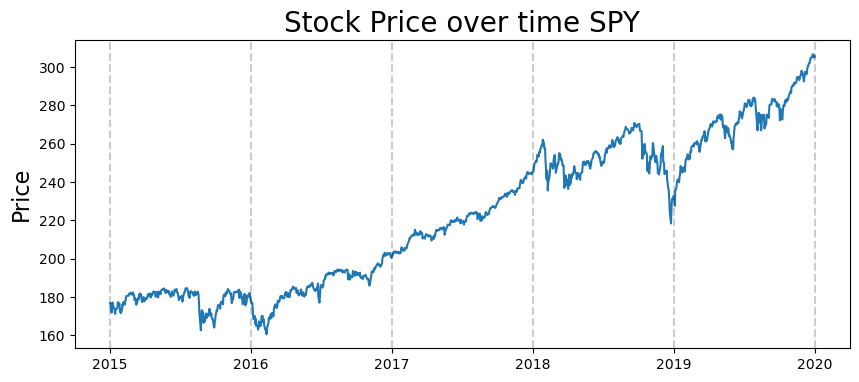

In [25]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title(f'Stock Price over time {tickerSymbol}',fontsize=20)
plt.ylabel('Price',fontsize=16)
    
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01') 
                , color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [26]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]


In [27]:
len(first_diffs)

1257

In [28]:
first_diffs = np.concatenate([first_diffs, [0]])
#it is used to add 0 at the end of the first_diffs array as we traverse till -1 as seen above code

In [29]:
len(first_diffs)

1258

In [30]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

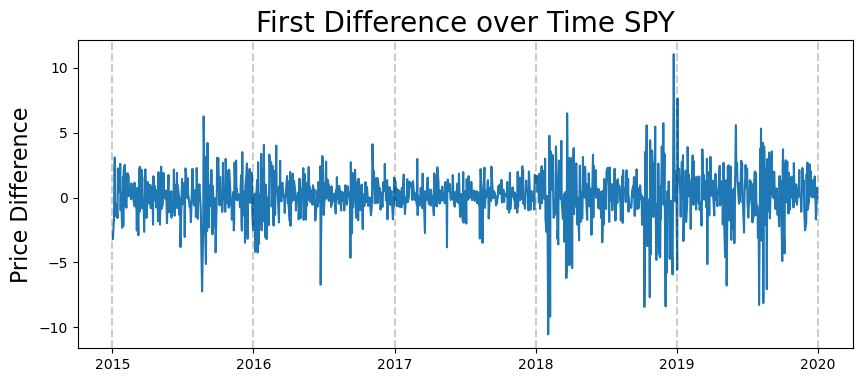

In [31]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title(f'First Difference over Time {tickerSymbol}', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)

for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01')
                , color='k', linestyle='--', alpha=0.2)



## ACF

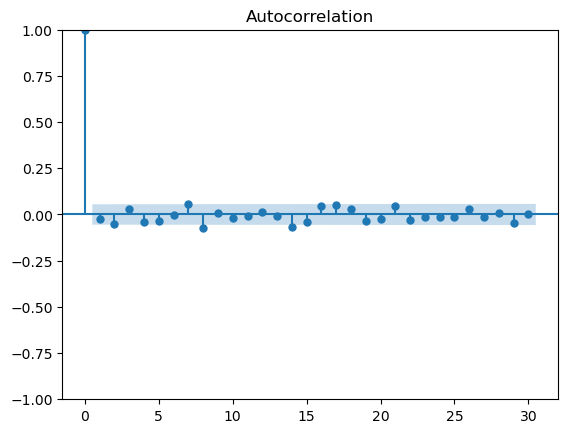

In [32]:
acf_plot = plot_acf(tickerDf.FirstDifference,lags=30)

## ACF isn't that informative as their is not strong lags

C:\Users\ABANERJ7\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


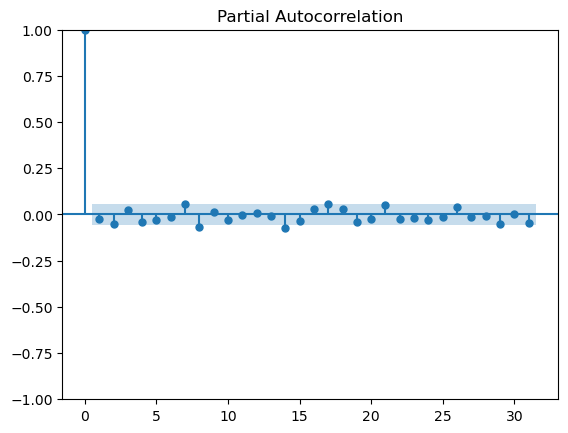

In [33]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

## PACF also doesn't provide any info